In [2]:
import pandas as pd
df = pd.read_csv('googleplaystore_user_reviews.csv')
df.dropna(axis = 0, inplace = True)

In [3]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [4]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

import matplotlib.pyplot as plt

In [5]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [8]:
words = basic_clean(''.join(str(df['Translated_Review'].tolist())))

In [10]:
(pd.Series(nltk.ngrams(words, 1)).value_counts())[:60]

(game,)       10241
(time,)        5581
(like,)        5554
(good,)        5238
(get,)         5142
(great,)       4792
(app,)         4764
(love,)        4748
(work,)        3420
(ad,)          3408
(would,)       3371
(cant,)        3111
(really,)      3085
(update,)      2985
(even,)        2870
(make,)        2847
(im,)          2831
(phone,)       2639
(need,)        2590
(play,)        2561
(please,)      2346
(also,)        2312
(much,)        2299
(keep,)        2258
(want,)        2194
(easy,)        2136
(way,)         2130
(thing,)       2061
(many,)        2009
(new,)         1968
(best,)        1962
(ive,)         1931
(back,)        1891
(level,)       1886
(every,)       1883
(still,)       1873
(fix,)         1862
(problem,)     1843
(fun,)         1837
(go,)          1816
(give,)        1770
(star,)        1765
(better,)      1751
(day,)         1741
(add,)         1690
(see,)         1671
(nice,)        1654
(free,)        1600
(used,)        1570
(could,)       1570


In [11]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:60]

(5, star)              713
(love, game)           696
(please, fix)          677
(every, time)          610
(great, game)          465
(love, app)            458
(great, app)           452
(many, ad)             421
(easy, use)            421
(good, game)           408
(full, review)         405
(cant, even)           313
(play, game)           305
(would, like)          290
(waste, time)          289
(really, like)         288
(game, play)           279
(even, though)         273
(really, good)         272
(playing, game)        254
(like, game)           253
(fun, game)            252
(new, update)          231
(work, well)           229
(cant, get)            228
(long, time)           223
(much, better)         222
(give, 5)              222
(game, fun)            220
(go, back)             206
(latest, update)       204
(good, app)            203
(game, like)           196
(love, love)           187
(game, good)           187
(last, update)         185
(game, great)          185
(

In [12]:
bigrams_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:40]
trigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:40]

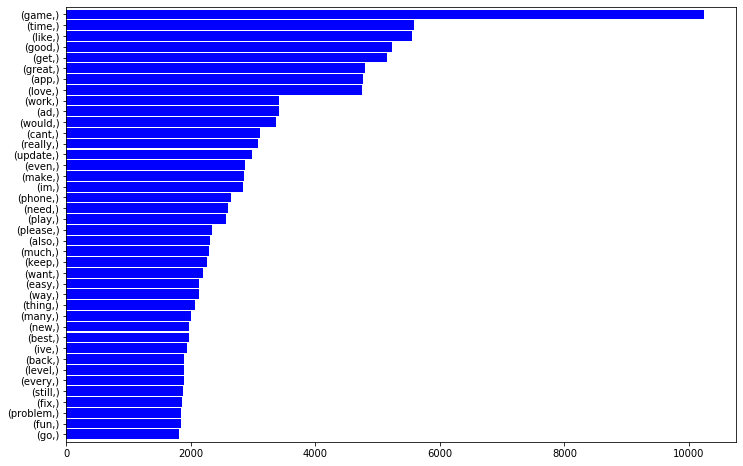

In [13]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

Text(0.5, 0, '# of Occurances')

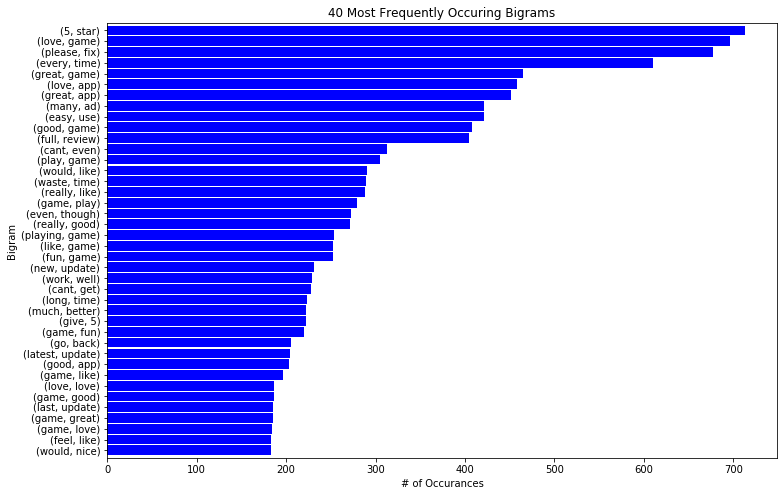

In [16]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('40 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')